# Chapter 10: How to make predictions with a linear regression model

In [20]:
import pandas as pd
import seaborn as sns

## Get the data

In [21]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [22]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')

In [23]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)

In [24]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   float64
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 365.6 KB


In [26]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False


## How to identify correlations with a scatterplot

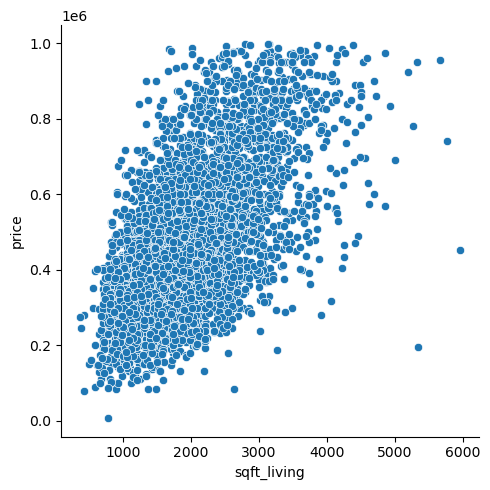

In [27]:
sns.relplot(data=housing, x='sqft_living', y='price')

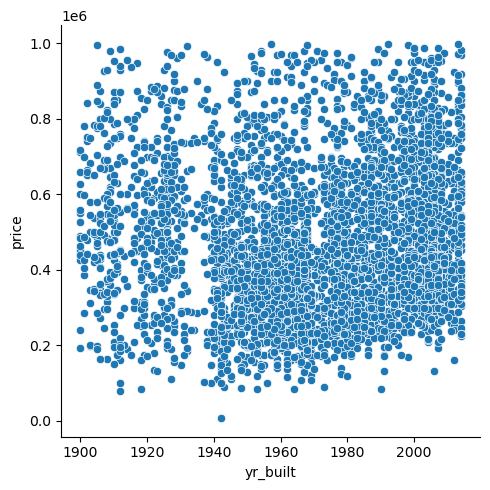

In [28]:
sns.relplot(data=housing, x='yr_built', y='price')

## How to identify correlations with a grid of scatterplots

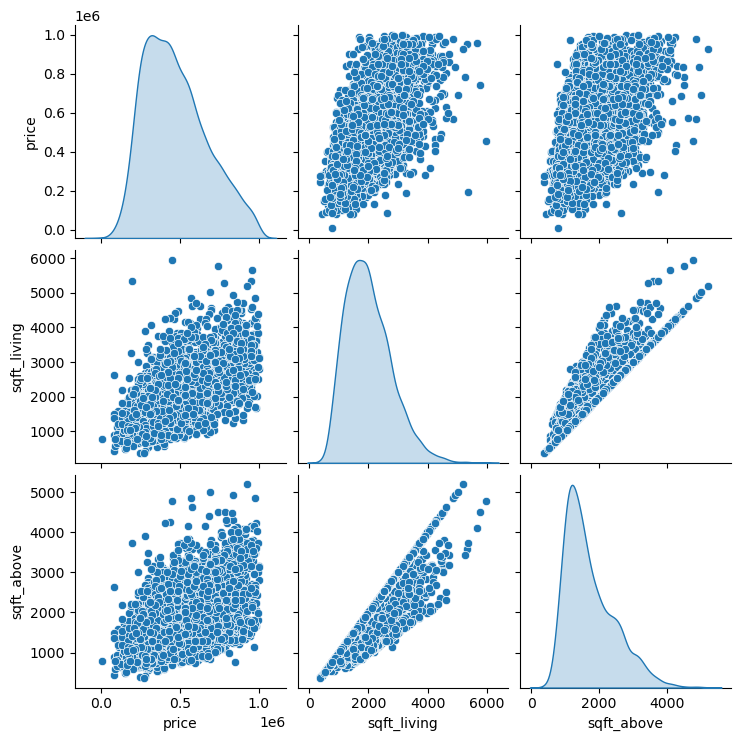

In [29]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above'], 
             diag_kind='kde')

## How to identify correlations with r-values

In [30]:
housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249


In [31]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<Axes: >

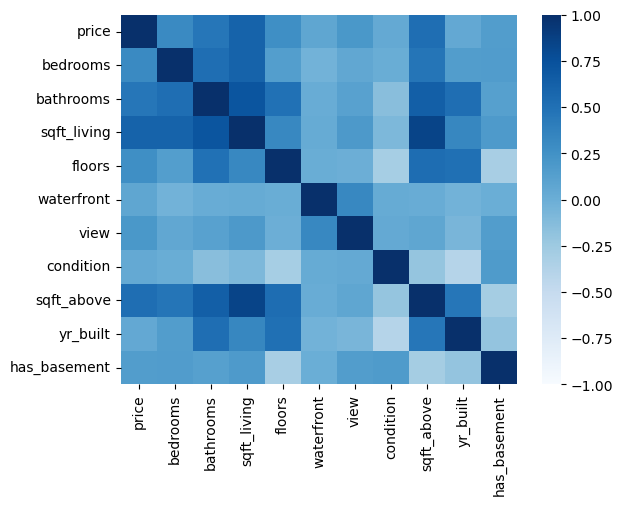

In [32]:
sns.heatmap(data=housing.corr(), cmap='Blues', vmin=-1.0, vmax=1.0)

<Axes: >

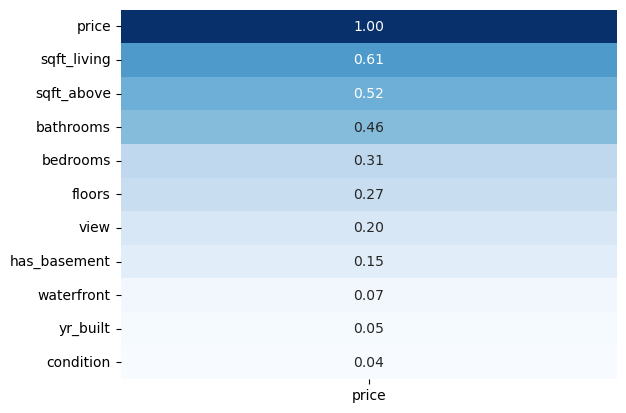

In [33]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    housing[['sqft_living']], housing[['price']], 
    test_size=0.33, random_state=42)

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# validate the model with the test dataset
linearModel.score(x_test, y_test)

0.3507265465332233

In [36]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[355333.11742787],
       [545363.47687159],
       [466838.5349527 ],
       ...,
       [325493.63949869],
       [415012.07328623],
       [394595.58838732]])

## How to plot the predicted data

In [37]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,sqft_living,price_type,price_value
0,1240,price,390000.0
1,2450,price,345000.0
2,1950,price,375000.0
3,2280,price,500324.0
4,2410,price,600000.0


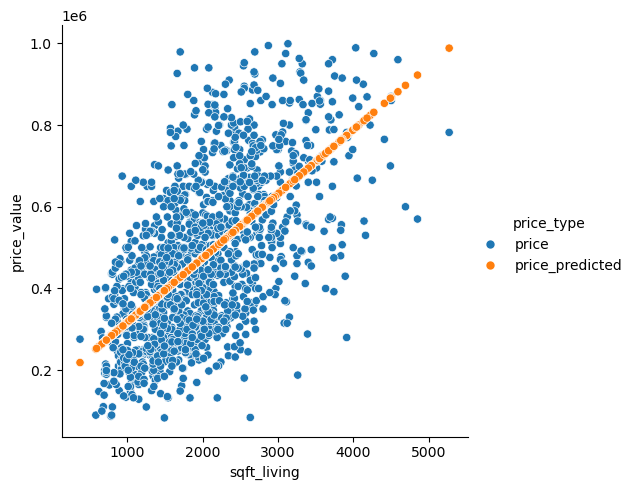

In [38]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

## How to plot the residuals

In [39]:
combined['residual'] = combined['price'] - combined['price_predicted']
combined.head()

,price_predicted,sqft_living,price,residual
0,355333.117428,1240,390000.0,34666.882572
1,545363.476872,2450,345000.0,-200363.476872
2,466838.534953,1950,375000.0,-91838.534953
3,518664.996619,2280,500324.0,-18340.996619
4,539081.481518,2410,600000.0,60918.518482


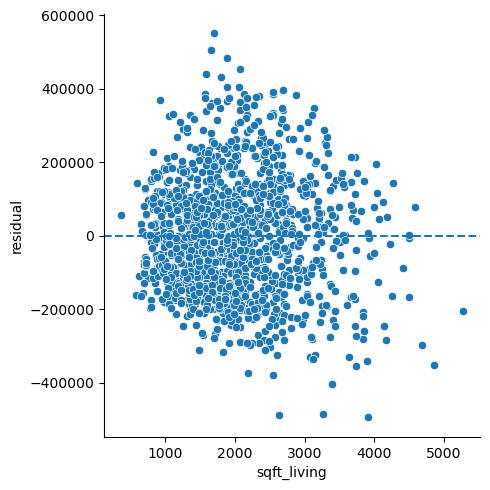

In [40]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--')

## How to plot a linear regression

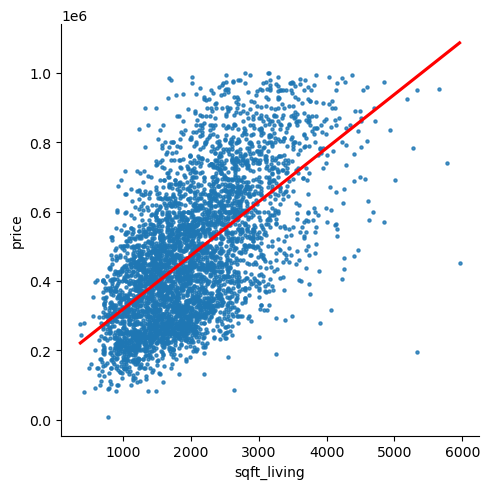

In [41]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

## How to plot a logistic regression

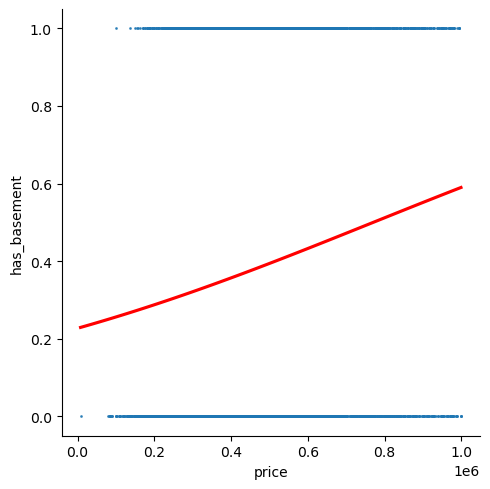

In [42]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'}, 
           logistic=True)

## How to plot a polynormal regression

In [43]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


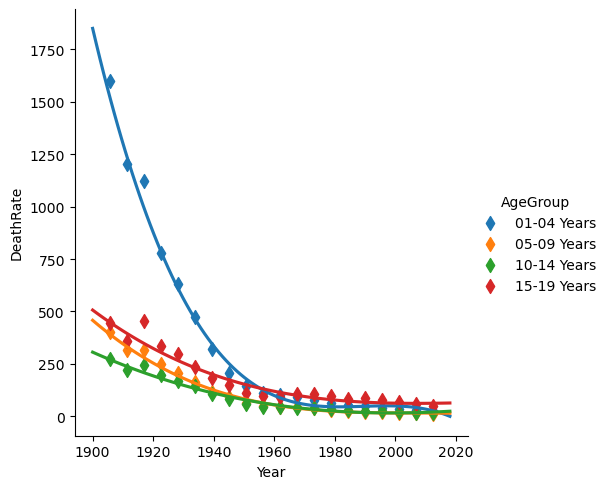

In [44]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

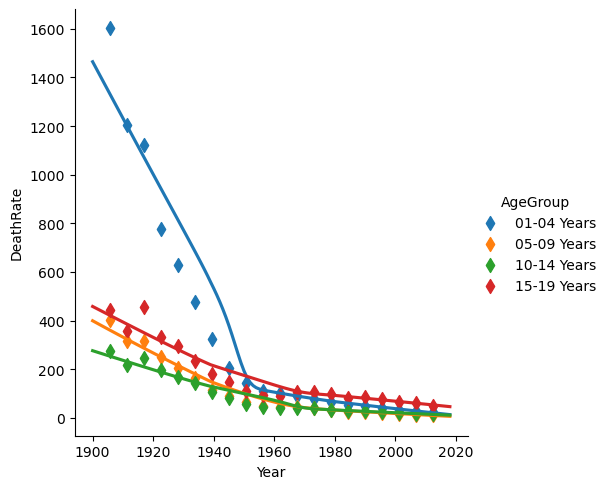

In [45]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<Axes: xlabel='sqft_living', ylabel='price'>

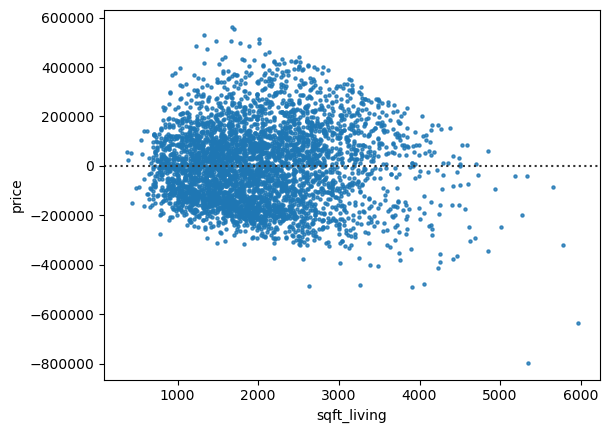

In [46]:
sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':5})

<Axes: xlabel='Year', ylabel='DeathRate'>

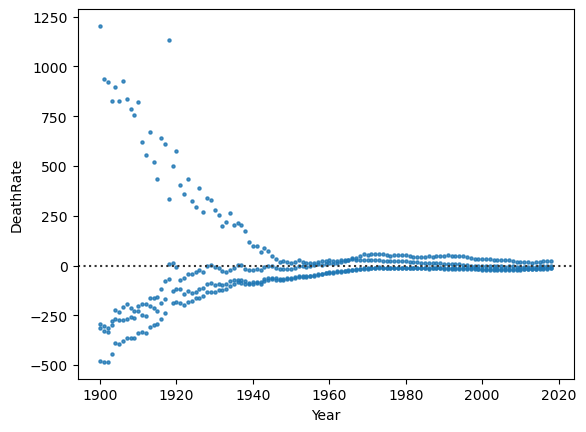

In [47]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':5})

## Multi-layer Perception (MLP)

| Linear Regression           | MLP Regressor               |
| --------------------------- | --------------------------- |
| Assumes linear relationship | Learns non-linear mappings  |
| Closed-form / OLS           | Gradient descent + backprop |
| No scaling required         | Scaling **required**        |
| Interpretable coefficients  | Black-box model             |


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


In [49]:
X = housing[['sqft_living']]
y = housing['price']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [50]:
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(32, 16),
        activation='relu',
        solver='adam',
        max_iter=5000,
        random_state=42
    ))
])


sqft_living  →  [32 neurons]  →  [16 neurons]  →  price


In [51]:
mlp_pipeline.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=5000,
                              random_state=42))])

In [52]:
print(mlp_pipeline)


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=5000,
                              random_state=42))])


In [53]:
y_pred = mlp_pipeline.predict(x_test)
r2_score(y_test, y_pred)


0.349193787160506

In [54]:
predicted = pd.DataFrame({
    'price_predicted': y_pred
})

combined = predicted.join([
    x_test.reset_index(drop=True),
    y_test.reset_index(drop=True)
])

combined.head()


,price_predicted,sqft_living,price
0,353654.022229,1240,390000.0
1,546913.067369,2450,345000.0
2,467435.993824,1950,375000.0
3,519890.862364,2280,500324.0
4,540554.901486,2410,600000.0


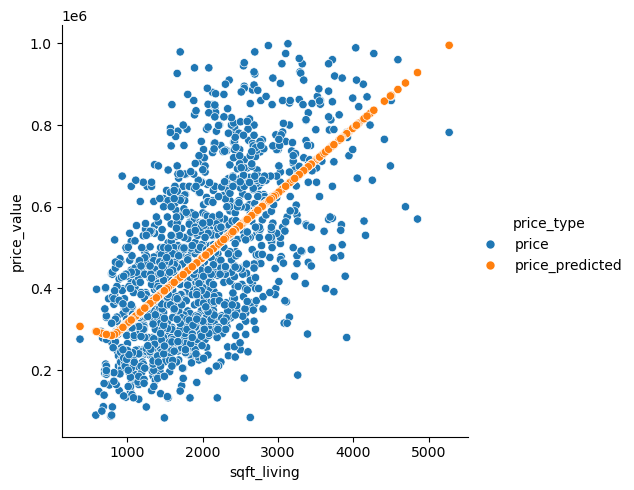

In [55]:
melted = pd.melt(
    combined,
    id_vars=['sqft_living'],
    value_vars=['price', 'price_predicted'],
    var_name='price_type',
    value_name='price_value'
)

sns.relplot(
    data=melted,
    x='sqft_living',
    y='price_value',
    hue='price_type'
)


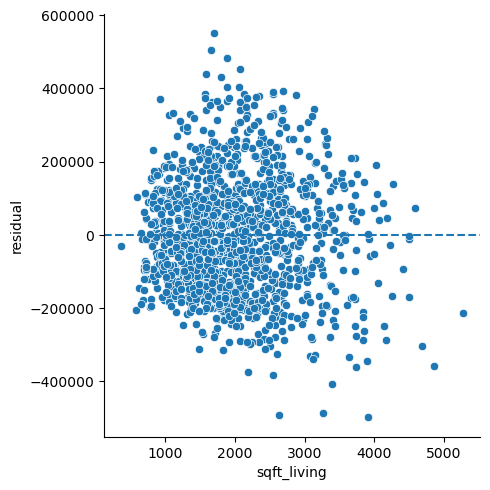

In [56]:
combined['residual'] = combined['price'] - combined['price_predicted']

g = sns.relplot(
    data=combined,
    x='sqft_living',
    y='residual'
)

for ax in g.axes.flat:
    ax.axhline(0, ls='--')


## MLP in PyTorch

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [58]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [59]:
X = housing[['sqft_living']].values
y = housing['price'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [60]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_X.fit_transform(x_train)
x_test  = scaler_X.transform(x_test)

y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)


In [61]:
X_train_t = torch.tensor(x_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(x_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)


In [62]:
class HousingMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)


In [63]:
model = HousingMLP()


In [64]:
print(model)


HousingMLP(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [65]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [66]:
epochs = 2000
losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.4f}")


Epoch    0 | Loss: 1.2130
Epoch  200 | Loss: 0.4869
Epoch  400 | Loss: 0.4857
Epoch  600 | Loss: 0.4855
Epoch  800 | Loss: 0.4853
Epoch 1000 | Loss: 0.4852
Epoch 1200 | Loss: 0.4851
Epoch 1400 | Loss: 0.4853
Epoch 1600 | Loss: 0.4849
Epoch 1800 | Loss: 0.4848


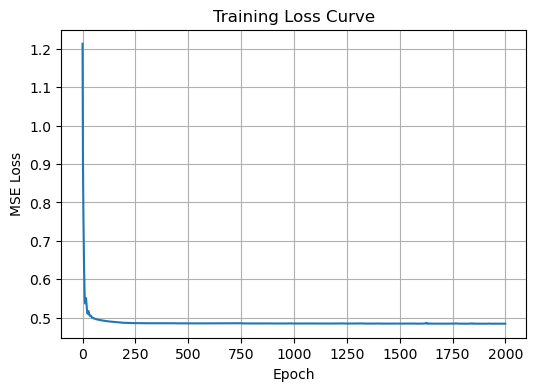

In [67]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [68]:
model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t)

y_pred = scaler_y.inverse_transform(y_pred_t.numpy())
y_true = scaler_y.inverse_transform(y_test)


In [69]:
r2_score(y_true, y_pred)


0.0323735896486137

Note:

| R² value    | Meaning                        |
| ----------- | ------------------------------ |
| 1.0         | Perfect prediction             |
| 0.6–0.8     | Strong (for real data)         |
| 0.3–0.6     | Moderate                       |
| 0.1–0.3     | Weak                           |
| **0.0–0.1** | **Very weak / almost none**    |
| < 0         | Worse than predicting the mean |


Your model explains ~3.5% of price variance.

That is not good.

This is not a PyTorch failure — it’s a modeling + data issue.

The earlier plots show:

- Very large houses
- Very expensive homes

These dominate variance and crush R².

MLPs:

Do not guarantee better performance

Need more data + features

Are easier to over/underfit

For this dataset:

Linear regression may actually perform better

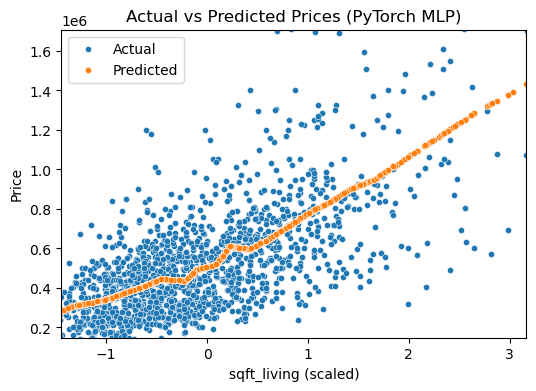

In [70]:
# Flatten arrays
x_vals = x_test.flatten()
y_vals = np.concatenate([y_true.flatten(), y_pred.flatten()])

# Compute robust limits (1st–99th percentile)
x_min, x_max = np.percentile(x_vals, [1, 99])
y_min, y_max = np.percentile(y_vals, [1, 99])

plt.figure(figsize=(6,4))
sns.scatterplot(x=x_vals, y=y_true.flatten(), label="Actual", s=20)
sns.scatterplot(x=x_vals, y=y_pred.flatten(), label="Predicted", s=20)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("sqft_living (scaled)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (PyTorch MLP)")
plt.legend()
plt.show()


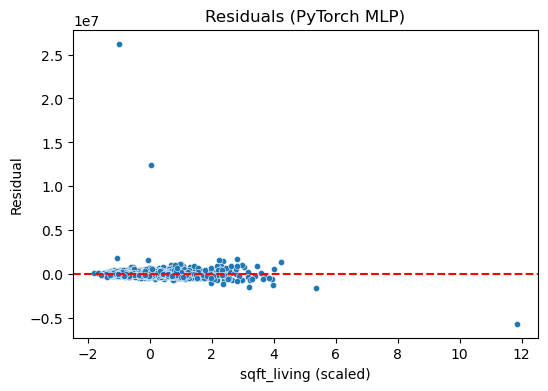

In [71]:
residuals = y_true.flatten() - y_pred.flatten()

plt.figure(figsize=(6,4))
sns.scatterplot(x=x_test.flatten(), y=residuals, s=20)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("sqft_living (scaled)")
plt.ylabel("Residual")
plt.title("Residuals (PyTorch MLP)")
plt.show()


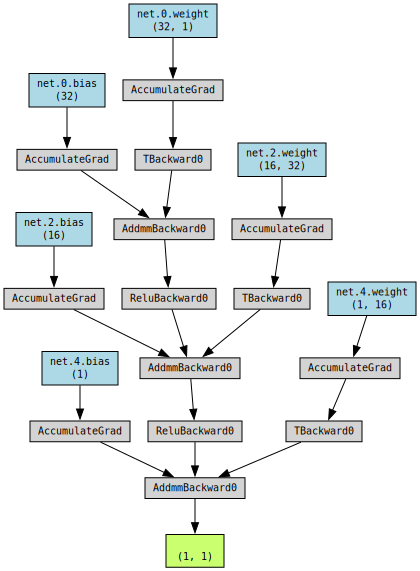

In [ ]:
from torchviz import make_dot

make_dot(
    model(X_train_t[:1]),
    params=dict(model.named_parameters())## A## ##3dsfasdfadssdffdfdsfadsfs
)


sqft_living
     ↓
Linear(1 → 32) + ReLU
     ↓
Linear(32 → 16) + ReLU
     ↓
Linear(16 → 1)
     ↓
Predicted Price


| Model             | Interpretability | Non-linearity | Visualization                |
| ----------------- | ---------------- | ------------- | ---------------------------- |
| Linear Regression | High             | ❌             | Line                         |
| sklearn MLP       | Medium           | ✅             | Pipeline only                |
| **PyTorch MLP**   | Low              | ✅             | **Full graph + loss curves** |


Compare with a Regression model. You will likely see higher or similar R², although still weak.

In [73]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train, y_train)

lin_pred = lin.predict(x_test)
r2_score(y_test, lin_pred)


0.05829072342987962

## Adding more features


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [21]:
housing = pd.read_csv("housingData.csv")


In [22]:
print(housing.columns.tolist())


['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [23]:

# Filter extreme values (same spirit as your earlier notebook)
housing = housing.query(
    "sqft_living < 8000 and price < 1_000_000 and price > 0"
)

features = [
    'sqft_living',
    'bedrooms',
    'bathrooms',
    'floors',
    'condition',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'waterfront',
    'view'
]


X = housing[features].values
y = housing['price'].values.reshape(-1, 1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [25]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)


In [26]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)


In [27]:
class HousingMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)


In [28]:
model = HousingMLP(input_dim=X_train.shape[1])
print(model)


HousingMLP(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [29]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [30]:
epochs = 3000
losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 300 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.4f}")


Epoch    0 | Loss: 1.0448
Epoch  300 | Loss: 0.3239
Epoch  600 | Loss: 0.2900
Epoch  900 | Loss: 0.2422
Epoch 1200 | Loss: 0.2466
Epoch 1500 | Loss: 0.2351
Epoch 1800 | Loss: 0.2108
Epoch 2100 | Loss: 0.2109
Epoch 2400 | Loss: 0.1964
Epoch 2700 | Loss: 0.2033


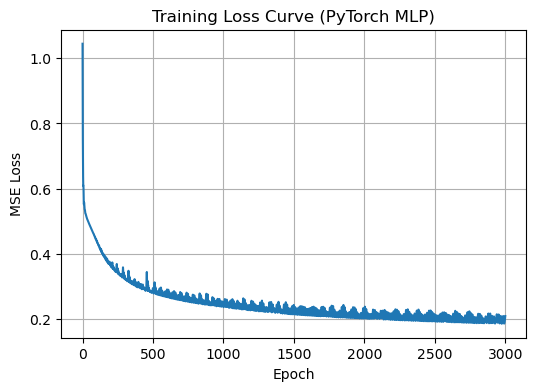

In [31]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (PyTorch MLP)")
plt.grid(True)
plt.show()


In [32]:
model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t)

y_pred = scaler_y.inverse_transform(y_pred_t.numpy())
y_true = scaler_y.inverse_transform(y_test)


In [33]:
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.3f}")


R² Score: -0.095


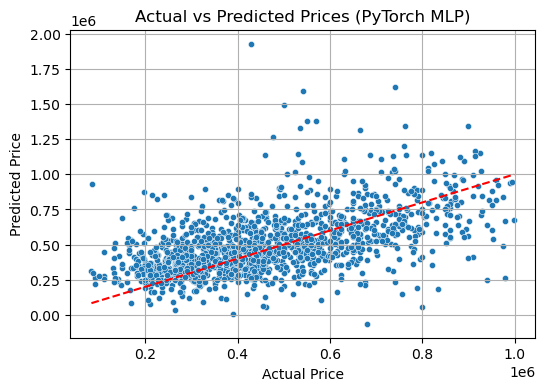

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_true.flatten(), y=y_pred.flatten(), s=20)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (PyTorch MLP)")
plt.grid(True)
plt.show()


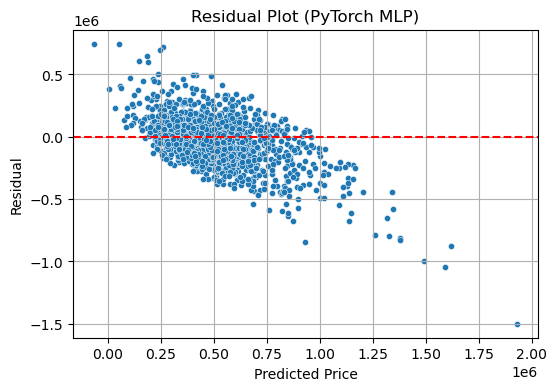

In [35]:
residuals = y_true.flatten() - y_pred.flatten()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred.flatten(), y=residuals, s=20)
plt.axhline(0, linestyle='--', color='red')

plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot (PyTorch MLP)")
plt.grid(True)
plt.show()


With sufficient features, neural networks can significantly outperform simple linear models. However, model complexity must be matched with appropriate data representation.

Compare against a linear regression baseline

In [36]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)

lin_pred = lin.predict(X_test)
lin_pred = scaler_y.inverse_transform(lin_pred)

print("Linear R²:", r2_score(y_true, lin_pred))


Linear R²: 0.4249403137430481


| Model                   | Typical R² range |
| ----------------------- | ---------------- |
| Linear regression       | **0.40 – 0.55**  |
| Well-trained MLP        | 0.50 – 0.70      |
| Tree ensembles          | 0.60 – 0.80      |
| With location (zipcode) | 0.80+            |


Why linear regression “works” better out of the box

Linear regression:

- Has a closed-form solution
- Cannot underfit variance due to optimization issues
- Is extremely robust on tabular data

Neural networks:

- Must learn the scale of the target
- Are sensitive to learning rate, target scaling, and initialization
- Can easily collapse toward the mean (low R², but “nice-looking” plots)

This is exactly what you observed.

On tabular housing data, linear regression provides a strong baseline. Neural networks can outperform it, but only when trained carefully. Model complexity does not replace sound preprocessing and optimization.

## Re-designing the MLP in PyTorch

We will:

1. Predict log(price) (this is the big one)
2. Standardize inputs only
3. Use Huber loss (robust regression)
4. Use BatchNorm (stabilizes training)
5. Use weight decay
6. Use lower LR
7. Train long enough

This is how tabular NN regression is done properly.

In [45]:
housing = housing.query(
    "sqft_living < 8000 and price < 1_000_000 and price > 0"
)

housing["log_price"] = np.log(housing["price"])


In [46]:
features = [
    "sqft_living",
    "bedrooms",
    "bathrooms",
    "floors",
    "condition",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "waterfront",
    "view"
]

X = housing[features].values
y = housing["log_price"].values.reshape(-1, 1)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [48]:
scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test  = scaler_X.transform(X_test)


In [49]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)


In [56]:
print("y_train min/max:", y_train.min(), y_train.max())
print("y_test  min/max:", y_test.min(),  y_test.max())

# After predicting log_pred
print("log_pred min/max:", log_pred.min(), log_pred.max())


y_train min/max: 8.961879012677683 13.81451005763069
y_test  min/max: 11.330203828154934 13.81451005763069
log_pred min/max: 11.065175 17.018063


In [50]:
class HousingMLP(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [51]:
model = HousingMLP(X_train.shape[1])


In [52]:
criterion = nn.HuberLoss(delta=1.0)

optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)


In [53]:
epochs = 6000
losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    preds = model(X_train_t)
    loss = criterion(preds, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.4f}")


Epoch    0 | Loss: 12.2163
Epoch  500 | Loss: 0.0298
Epoch 1000 | Loss: 0.0235
Epoch 1500 | Loss: 0.0274
Epoch 2000 | Loss: 0.0180
Epoch 2500 | Loss: 0.0165
Epoch 3000 | Loss: 0.0177
Epoch 3500 | Loss: 0.0158
Epoch 4000 | Loss: 0.0181
Epoch 4500 | Loss: 0.0132
Epoch 5000 | Loss: 0.0145
Epoch 5500 | Loss: 0.0155


In [54]:
model.eval()
with torch.no_grad():
    log_pred = model(X_test_t).numpy()

# back-transform
y_pred = np.exp(log_pred)
y_true = np.exp(y_test)


In [55]:
r2 = r2_score(y_true, y_pred)
print("NN R²:", r2)


NN R²: -12.709389632670346


Neural networks on tabular data require careful target transformation and optimization. When applied correctly, they can outperform linear models, but they are not plug-and-play.

Epoch   1 | TrainLoss=11.1412 | Val R² (log)=-506.1882
Epoch  25 | TrainLoss=0.2208 | Val R² (log)=0.4995
Epoch  50 | TrainLoss=0.2125 | Val R² (log)=0.5049
Epoch  75 | TrainLoss=0.2018 | Val R² (log)=0.5218
Early stopping at epoch 94. Best Val R² (log)=0.5314

TEST R² (log-space): 0.458581138449102
TEST R² (price-space): 0.45896409360351187
RMSE (price): 143107.09449403666
MAE  (price): 112832.37379957811


e:\anaconda3\envs\aida2158a\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


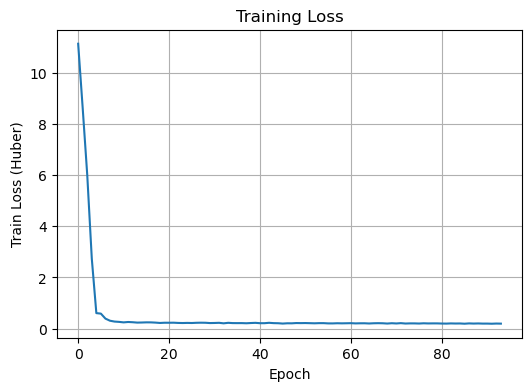

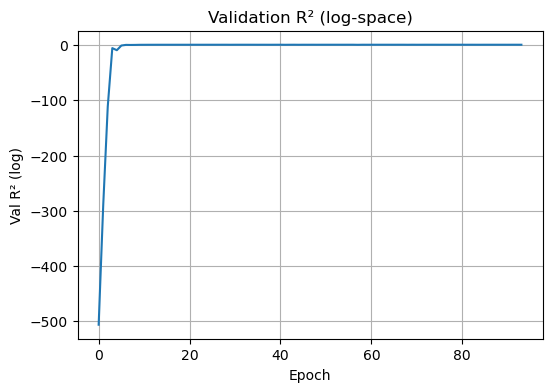

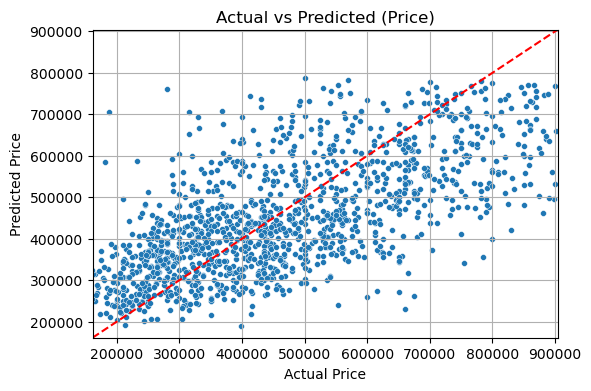

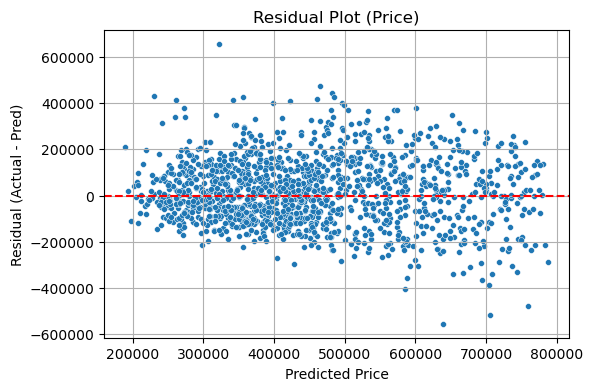

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ----------------------------
# Reproducibility
# ----------------------------
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# ----------------------------
# Load + filter (same spirit as your notebook)
# ----------------------------
housing = pd.read_csv("housingData.csv")
housing = housing.query("sqft_living < 8000 and price < 1000000 and price > 0").copy()

# Target transform (KEY)
housing["log_price"] = np.log(housing["price"].astype(np.float64))


housing["statezip"] = housing["statezip"].astype("category").cat.codes


# Features present in your file
features = [
    "sqft_living",
    "bedrooms",
    "bathrooms",
    "floors",
    "condition",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "waterfront",
    "view",
    "statezip"   # Try it with and without this feature
]



X = housing[features].astype(np.float64).values
y = housing["log_price"].astype(np.float64).values.reshape(-1, 1)

# ----------------------------
# Train / Val / Test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=SEED
)

# ----------------------------
# Scale X only (DO NOT scale y)
# ----------------------------
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val   = scaler_X.transform(X_val)
X_test  = scaler_X.transform(X_test)

# ----------------------------
# Torch tensors
# ----------------------------
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# ----------------------------
# DataLoader (mini-batch training)
# ----------------------------
train_ds = torch.utils.data.TensorDataset(X_train_t, y_train_t)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True)

# ----------------------------
# Model (LayerNorm > BatchNorm for tabular stability)
# ----------------------------
class HousingMLP(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.10),

            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.10),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model = HousingMLP(d=X_train.shape[1])

# Loss + optimizer
criterion = nn.HuberLoss(delta=1.0)
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# ----------------------------
# Train with early stopping on VAL R² (log-space)
# ----------------------------
best_val_r2 = -np.inf
best_state = None
patience = 20
patience_left = patience

train_losses = []
val_r2_hist = []

for epoch in range(1, 501):  # 500 epochs is usually enough with mini-batches
    model.train()
    epoch_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)

    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Validation R² in log space
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t).cpu().numpy()
        val_true = y_val

    val_r2 = r2_score(val_true, val_pred)
    val_r2_hist.append(val_r2)

    if epoch % 25 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d} | TrainLoss={epoch_loss:.4f} | Val R² (log)={val_r2:.4f}")

    # Early stopping
    if val_r2 > best_val_r2 + 1e-4:
        best_val_r2 = val_r2
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left <= 0:
            print(f"Early stopping at epoch {epoch}. Best Val R² (log)={best_val_r2:.4f}")
            break

# Restore best model
if best_state is not None:
    model.load_state_dict(best_state)

# ----------------------------
# Test evaluation
# ----------------------------
model.eval()
with torch.no_grad():
    test_log_pred = model(X_test_t).cpu().numpy()

test_log_true = y_test

r2_log = r2_score(test_log_true, test_log_pred)
print("\nTEST R² (log-space):", r2_log)

# Convert to price space for human-readable plots/metrics
y_true_price = np.exp(test_log_true)
y_pred_price = np.exp(test_log_pred)

r2_price = r2_score(y_true_price, y_pred_price)
rmse = mean_squared_error(y_true_price, y_pred_price, squared=False)
mae  = mean_absolute_error(y_true_price, y_pred_price)

print("TEST R² (price-space):", r2_price)
print("RMSE (price):", rmse)
print("MAE  (price):", mae)

# ----------------------------
# Visualizations
# ----------------------------
# 1) Loss curve
plt.figure(figsize=(6,4))
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Train Loss (Huber)")
plt.title("Training Loss")
plt.grid(True)
plt.show()

# 2) Validation R² curve
plt.figure(figsize=(6,4))
plt.plot(val_r2_hist)
plt.xlabel("Epoch")
plt.ylabel("Val R² (log)")
plt.title("Validation R² (log-space)")
plt.grid(True)
plt.show()

# 3) Actual vs Predicted (price-space) with robust axis limits
vals = np.concatenate([y_true_price.flatten(), y_pred_price.flatten()])
ymin, ymax = np.percentile(vals, [1, 99])

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_true_price.flatten(), y=y_pred_price.flatten(), s=18)
plt.plot([ymin, ymax], [ymin, ymax], "r--")
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Price)")
plt.grid(True)
plt.show()

# 4) Residuals (price-space)
residuals = y_true_price.flatten() - y_pred_price.flatten()
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_price.flatten(), y=residuals, s=18)
plt.axhline(0, ls="--", color="red")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Pred)")
plt.title("Residual Plot (Price)")
plt.grid(True)
plt.show()


Without location information, this dataset simply does not contain enough signal to reach R² ≥ 0.7.

| Feature group                 | Variance explained |
| ----------------------------- | ------------------ |
| **Location (zipcode / city)** | **40–50%**         |
| Size (sqft, rooms)            | 15–25%             |
| Quality / condition           | 5–10%              |
| Year built / renovated        | 5–10%              |
